# 의사결정나무

## 1. 분류와 회귀나무 CART

`rpart` 패키지: 분류와 회귀나무의 아이디어를 구현한 패키지

`rpart::rpart`: 재귀적 분할과 회귀 나무를 생성한다<br>
`rpart::predict.rpart`: rpart를 사용한 예측 수행한다<br>
`rpart::plot.rpart`: rpart를 그래프로 그린다<br>
`rpart.plot::prp`: rpart를 그래프로 그린다

In [1]:
library(rpart)

가지가 갈라지는 모양(들여쓰기)과 잎사귀 노드 (*)를 확인할 수 있으며 가지의 기준과 노드에 분리된 데이터의 개수와 분리 라벨, 그리고 각 라벨 별 확률이 출력된다.

예를 들어, 3)은 뿌리노드에서 갈라진 좌측 가지 밑의 노드로,
- 기준은 Petal.Length >=2.45이고
- 이 기준을 만족하는 경우는 100개였으며
- 100개의 데이터 중에 versicolor와 virginica의 비율은 50%, 50%인 것이다.

**트리 구축**

In [3]:
m <- rpart(Species ~., data = iris)
m

n= 150 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 150 100 setosa (0.33333333 0.33333333 0.33333333)  
  2) Petal.Length< 2.45 50   0 setosa (1.00000000 0.00000000 0.00000000) *
  3) Petal.Length>=2.45 100  50 versicolor (0.00000000 0.50000000 0.50000000)  
    6) Petal.Width< 1.75 54   5 versicolor (0.00000000 0.90740741 0.09259259) *
    7) Petal.Width>=1.75 46   1 virginica (0.00000000 0.02173913 0.97826087) *

**시각화**

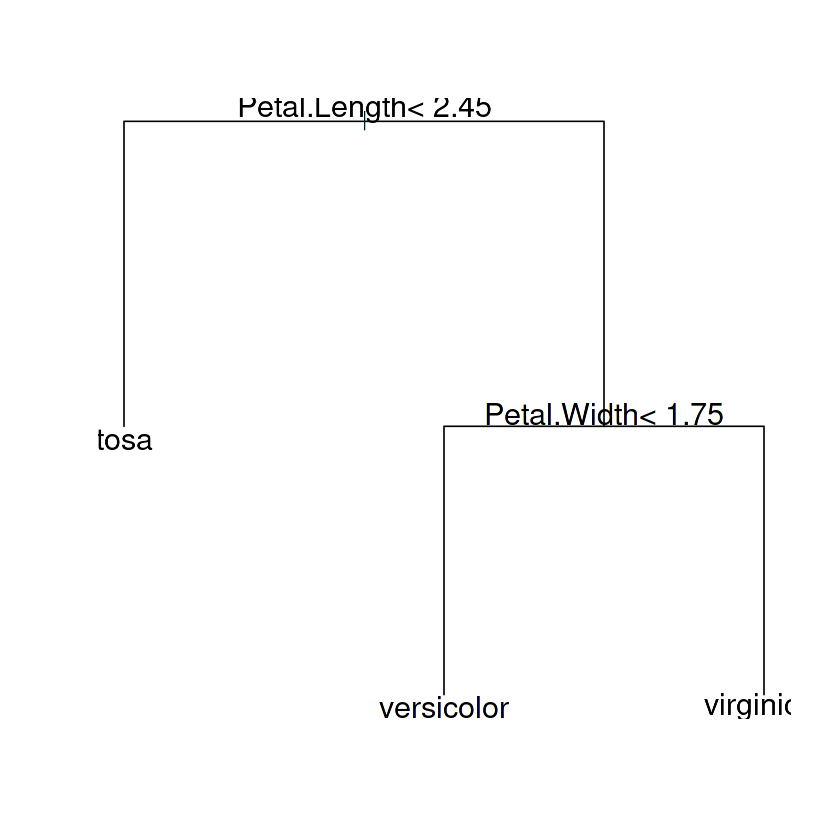

In [9]:
plot(m)
text(m, cex=1.5)

In [10]:
library(rpart.plot)

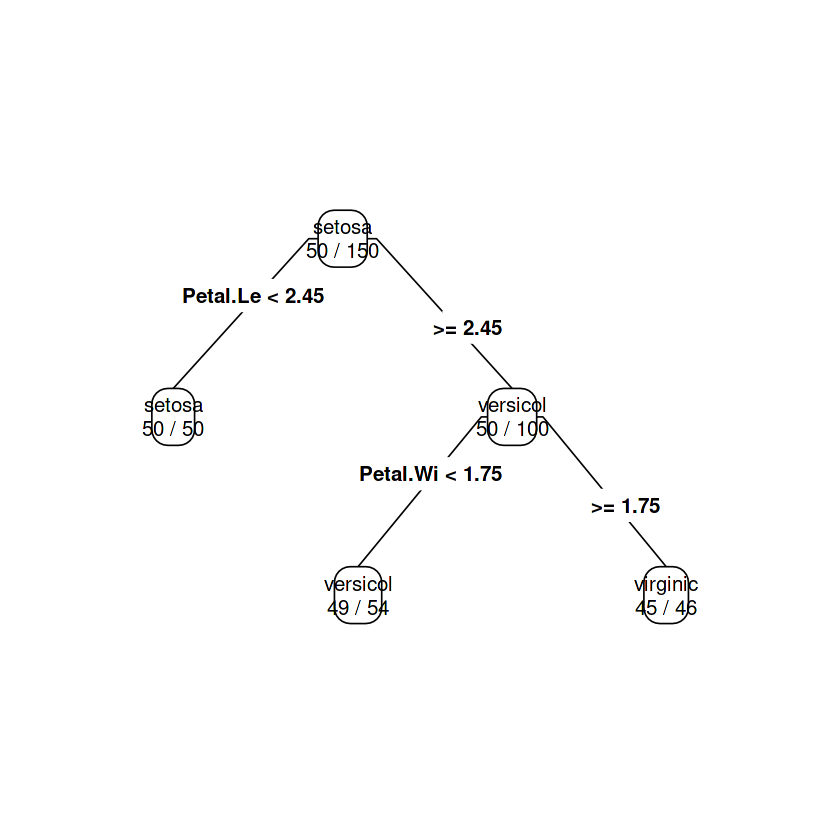

In [13]:
# type=4 모든 노드에 레이블, extra=2 각 노드에 올바르게 예측된 데이터의 비율
prp(m, type=4, extra=2, digits=3)

**새로운 데이터 예측**

In [14]:
head(predict(m, newdata=iris, type="class"))

1      2      3      4      5      6 
setosa setosa setosa setosa setosa setosa 
Levels: setosa versicolor virginica

---

## 2. 조건부 추론 나무

`party::ctree`: 조건부 추론 나무 모델 생성<br>
`party::predict.BinaryTree`: ctree를 사용한 예측을 수행한다

In [16]:
library(party)

**트리 구축**

In [21]:
m <- ctree(Species ~., data=iris)
m


	 Conditional inference tree with 4 terminal nodes

Response:  Species 
Inputs:  Sepal.Length, Sepal.Width, Petal.Length, Petal.Width 
Number of observations:  150 

1) Petal.Length <= 1.9; criterion = 1, statistic = 140.264
  2)*  weights = 50 
1) Petal.Length > 1.9
  3) Petal.Width <= 1.7; criterion = 1, statistic = 67.894
    4) Petal.Length <= 4.8; criterion = 0.999, statistic = 13.865
      5)*  weights = 46 
    4) Petal.Length > 4.8
      6)*  weights = 8 
  3) Petal.Width > 1.7
    7)*  weights = 46 

**시각화**

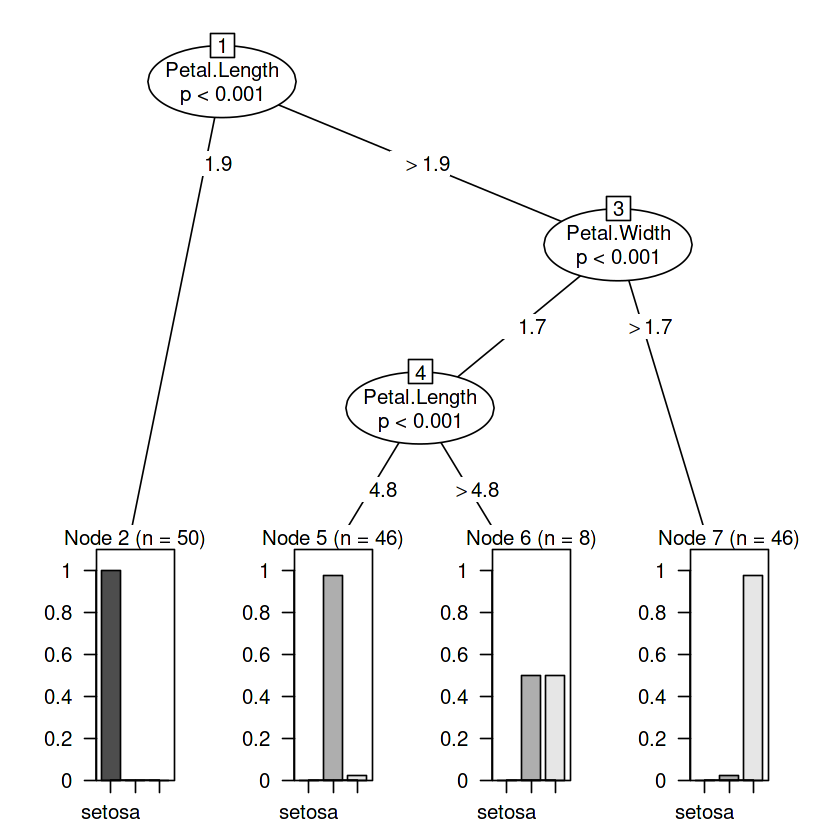

In [22]:
plot(m)

**새로운 데이터 예측**

---

## 3. 랜덤포레스트

`randomForest::randomForest`: 랜덤 포레스트 생성 <br>
`randomForest::predict.randomForest`: 랜덤 포레스트를 사용한 예측 수행<br>
`randomForest::importance`: 랜덤 포레스트로부터 변수의 중요도 출력<br>
`randomForest::varImpPlot`: 변수 중요도의 그래프

In [29]:
library(randomForest)

**랜덤포레스트 모델링**

랜덤 포레스트 모델 훈련에 사용되지 않은 데이터를 사용한 에러 추정치가 OOB (Out Of Bag) estimate of  error rate 항목으로 출력된다.<br>
OOB 에러가 4% 였으며 versicolor가 virginica로 예측된 경우가 3개, virginica가 versicolor로 예측된 경우가 3개 있었음을 알 수 있다.

In [31]:
m <- randomForest(Species ~., data=iris)
m


Call:
 randomForest(formula = Species ~ ., data = iris) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 2

        OOB estimate of  error rate: 4%
Confusion matrix:
           setosa versicolor virginica class.error
setosa         50          0         0        0.00
versicolor      0         47         3        0.06
virginica       0          3        47        0.06

**예측**

In [32]:
head(predict(m, newdata=iris))

1      2      3      4      5      6 
setosa setosa setosa setosa setosa setosa 
Levels: setosa versicolor virginica

**빠른 모델링**

모델을 빠르게 만드는 방법 중 하나는 포뮬러 대신 설명 변수와 종속 변수를 직접 지정하는 것이다. 

In [33]:
m <- randomForest(iris[,1:4], iris[, 5])
m


Call:
 randomForest(x = iris[, 1:4], y = iris[, 5]) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 2

        OOB estimate of  error rate: 4%
Confusion matrix:
           setosa versicolor virginica class.error
setosa         50          0         0        0.00
versicolor      0         47         3        0.06
virginica       0          3        47        0.06

**변수 중요도 평가**

변수가 정확도와 노드 불순도 개선에 얼마만큼 기여하는지로 변수 중요도가 측정된다.<br>
변수 중요도는 다른 모델에 사용할 변수를 선택하는데 사용할 수 있는 필터 방법이다.

정확도 (MeanDecreaseAccuracy)에서는 Petal.Length, Petal.Width, Sepal.Length, Sepal.Width 순으로 중요하며<br>
불순도 개선 (MeanDecreaseGini) 에서는 Petal.Width, Petal.Length, Sepal.Length, Sepal.Width 순으로 중요하다.<br>
평균으로 측정하는 이유는 다수의 의사결정나무로부터 변수의 정확도 및 노드 불순도 개선에 대한 기여도를 평가하기 때문이다.

In [37]:
m <- randomForest(Species ~., data=iris, importance=TRUE)
importance(m)

,setosa,versicolor,virginica,MeanDecreaseAccuracy,MeanDecreaseGini
Sepal.Length,5.874825,8.255193,8.903527,12.036376,10.478924
Sepal.Width,4.034607,1.310653,4.700534,4.878037,2.200051
Petal.Length,23.406301,34.786241,28.744348,35.190489,43.168444
Petal.Width,21.396030,31.404230,29.019806,32.042184,43.395535


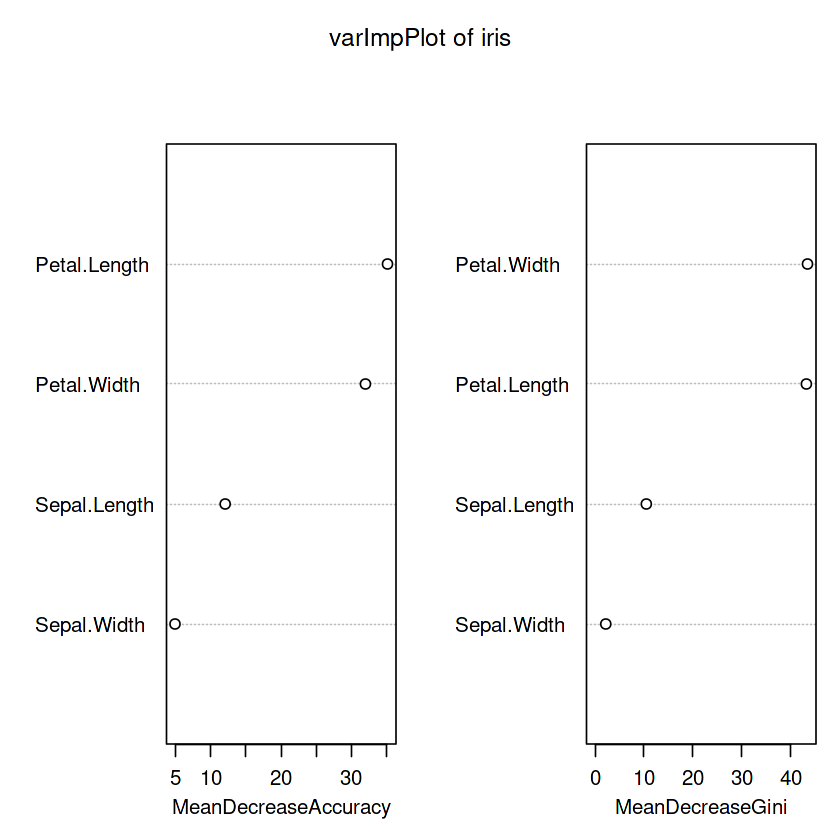

In [38]:
varImpPlot(m, main="varImpPlot of iris")

**파라미터 튜닝**

랜덤 포레스트에서 나무 개수 ntree, 분류 기준을 정할 때 고려할 변수의 개수 mtry 등의 파라미터가 있는데 이 값들을 조절하며 모델을 개선해보자. 이는 교차 검증을 사용하여 수행할 수 있다. 파이썬의 `GridSearchCV` 메서드와 비슷하다고 볼 수 있다.

`expand.grid`: 가능한 모든 팩터 레벨의 조합을 만든다

ntree를 10, 100, 200으로, mtry를 3, 4로 바꿔가면서 조합해보자.

In [40]:
grid <- expand.grid(ntree=c(10, 100, 200), mtry=c(3, 4))
grid

ntree,mtry
<dbl>,<dbl>
10,3
100,3
200,3
10,4
100,4
200,4


파라미터 조합을 10개로 분할한 데이터에 적용하여 모델의 성능을 평가하는 작업을 3회 반복하면서 최상의 파라미터를 찾아보자.<br>
foreach 문의 .combine에 rbind를 사용한 이유는 반환 값을 리스트 형태가 아닌 데이터프레임으로 모으기 위해서이다. 그 결과, result에 grid에서의 색인과 성능이 데이터 프레임으로 반환된 것을 볼 수 있다.

In [48]:
library(foreach)
library(cvTools)

set.seed(719)
K = 10
R = 3
cv <- cvFolds(NROW(iris), K=K, R=R)

grid <- expand.grid(ntree=c(10, 100, 200), mtry=c(3, 4))

result <- foreach(g=1:NROW(grid), .combine=rbind) %do% {
    foreach(r=1:R, .combine=rbind) %do% {
        foreach(k=1:K, .combine=rbind) %do% {
            validation_idx <- cv$subsets[which(cv$which == k), r]
            train <- iris[-validation_idx, ]
            validation <- iris[validation_idx, ]
            
            # 모델 훈련
            m <- randomForest(Species ~., data=train, ntree=grid[g, "ntree"], mtry=grid[g, "mtry"])
            
            # 예측
            predicted <- predict(m, newdata=validation)
            
            # 성능평가
            precision <- sum(predicted == validation$Species) / NROW(predicted)
            return(data.frame(g=g, precision=precision))

        }
    }
}

In [49]:
result

g,precision
<int>,<dbl>
1,1.0000000
1,0.8666667
1,0.9333333
1,1.0000000
1,1.0000000
1,1.0000000
1,0.9333333
1,0.9333333
1,1.0000000


grid의 색인을 기준으로 묶어 성능의 평균을 구해보자.

In [51]:
library(plyr)
ddply(result, .(g), summarize, mean_precision=mean(precision))

g,mean_precision
<int>,<dbl>
1,0.9466667
2,0.9511111
3,0.9511111
4,0.9466667
5,0.9577778
6,0.9488889


가장 높은 성능을 보인 조합은 g=5 일 때이다. 파라미터 조합을 grid에서 찾아보면 ntree가 100이고 mtry가 4인 경우임을 알 수 있다.

In [52]:
grid[5, ]

,ntree,mtry
,<dbl>,<dbl>
5,100,4
